<center><h1>PyTorch Introduction with Feed-forward Neural Network</h1></center>

Additional tutorials to check out: 
- [PyTorch Intro](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [PyTorch NLP Intro](https://pytorch.org/tutorials/beginner/deep_learning_nlp_tutorial.html)
- [Neural Net intro in PyTorch](https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html#sphx-glr-beginner-nlp-deep-learning-tutorial-py)

<h4>
<br>The concepts covered in this tutorial are: 
<br>1. Python intro
<br>2. Tensors & tensor operations
<br>3. Create sample dataset & data loader
<br>4. Neural Network intro
</h4>

In [ ]:
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# PyTorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import FloatTensor
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader 
from torch.utils.data.dataset import random_split

# to make nice plots
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
plt.style.use('ggplot')

In [65]:
print('CUDA available: ', torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

CUDA available:  True


device(type='cuda')

## 1. Python bridge

**Dictionary**

In [34]:

s = [('jeffrey', 28), ('alex', 30)]
people_age = {k:v for k, v in s}
print('original dictionary:', people_age)
people_age['timo'] = 35
print('dictionary after timo:', people_age)


from collections import defaultdict
people_age_default = defaultdict(int)
for k, v in people_age.items():
    people_age_default[k] = v

print('default dict', people_age_default)

original dictionary: {'jeffrey': 28, 'alex': 30}
dictionary after timo: {'jeffrey': 28, 'alex': 30, 'timo': 35}
default dict defaultdict(<class 'int'>, {'jeffrey': 28, 'alex': 30, 'timo': 35})


In [32]:
print(people_age_default['jeffrey2'])

0


**Pandas dataframe**

In [ ]:
DATA_PATH = 'data/imdb_reviews.csv'
if not Path(DATA_PATH).is_file():
    gdd.download_file_from_google_drive(
        file_id='1zfM5E6HvKIe7f3rEt1V2gBpw5QOSSKQz',
        dest_path=DATA_PATH,
    )

df = pd.read_csv(DATA_PATH)

In [44]:
print(type(df))
print(type(df.review))
df.head(3)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,review,label,first_word
0,Once again Mr. Costner has dragged out a movie...,0,Once
1,This is an example of why the majority of acti...,0,This
2,"First of all I hate those moronic rappers, who...",0,First


In [45]:
df.review[:5].tolist()

["Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.",
 "This is an example of why the majority of action films are the same. Generic and boring, ther

In [38]:
def get_first_word(text):
    return text.split()[0]

df['first_word'] = df.review.apply(get_first_word)
df.head(3)

,review,label,first_word
0,Once again Mr. Costner has dragged out a movie...,0,Once
1,This is an example of why the majority of acti...,0,This
2,"First of all I hate those moronic rappers, who...",0,First


**Class inheritence**

In [ ]:
class people(object):
    def __init__(self, name, height, age):
        self.name = name
        self.height = height
        self.age = age
   
    def get_age(self):
        return self.age
  
  
class professor(people):
    def __init__(self, name, height, age, classes_taught=['statistics', 'calculus']):
        super(professor, self).__init__(name=name, height=height, age=age)
        self.title = 'Professor'
        self.classes_taught = classes_taught
  
    def get_age(self):
        return 'always 25'


class student(people):
    def __init__(self, name, height, age, graduation_year):
        super(student, self).__init__(name=name, height=height, age=age)
        self.graduation_year = graduation_year
    

In [18]:
donald = people('Donald Trump', 180, 65)
print(donald.name, 'age is ', donald.get_age())

aemon = professor('Maester Aemon', 170, 105)
print(aemon.name, 'age is', aemon.get_age())
print(aemon.name, 'has taught', ', '.join(aemon.classes_taught))

john = student('John Snow', 175, 20, 1265)
print(john.name, 'age is', john.get_age())
print(john.name, 'graduation year:', john.graduation_year)

Donald Trump age is  65
Maester Aemon age is always 25
Maester Aemon has taught statistics, calculus
John Snow age is 20
John Snow graduation year: 1265


## 1. Tensors

![Tensors](https://github.com/scoutbeedev/pytorch-nlp-notebooks/blob/master/images/tensors.jpg?raw=1)


- 0 dimension : scalar
- 1 dimension : vector
- 2 dimension : matrix
- 3 and above dimension : higher order tensors

#### 1.1 create tensors

**sample from uniform distribution**

In [ ]:
# sample from uniform distribution on interval [0,1)
a = torch.rand([3, 2, 4], dtype=torch.float)
print(a.size())
a

torch.Size([3, 2, 4])


tensor([[[9.3290e-01, 1.8002e-01, 7.6481e-01, 7.8839e-01],
         [2.2025e-02, 1.8197e-01, 3.3011e-02, 1.4004e-01]],

        [[7.0514e-01, 2.8230e-01, 8.3122e-01, 2.1743e-01],
         [2.8923e-02, 7.9992e-01, 7.5044e-01, 6.9387e-01]],

        [[3.6114e-01, 2.1788e-01, 9.9166e-01, 2.9854e-02],
         [5.6667e-01, 9.9337e-01, 6.9594e-04, 7.8854e-01]]])

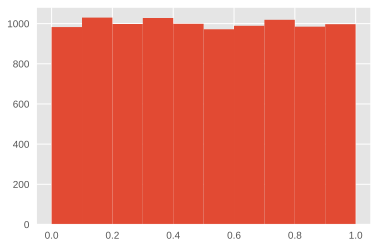

In [22]:
plt.hist(torch.rand(10000, dtype=torch.float))
plt.show()

**sample from standard normal distribution**
$$X \sim \mathcal{N}(\mu,\,\sigma^{2})$$
$$\mu = 0, \sigma^2 = 1$$

In [19]:
b = torch.randn([3, 2, 4], dtype=torch.float)
print(b.size())
b

torch.Size([3, 2, 4])


tensor([[[ 1.8642e-01, -6.8515e-01, -9.8803e-01,  5.2867e-01],
         [ 1.0743e+00, -7.8558e-04, -1.0571e+00, -4.4390e-01]],

        [[ 3.9218e-01,  4.4408e-01, -6.2614e-01, -4.0125e-01],
         [ 7.8088e-02, -3.8251e-01,  5.3286e-01,  1.4067e+00]],

        [[-1.6751e-01,  3.3810e-01, -2.1594e-01, -5.1247e-01],
         [-9.4422e-01, -8.3322e-02,  1.0090e-01,  2.3436e-01]]])

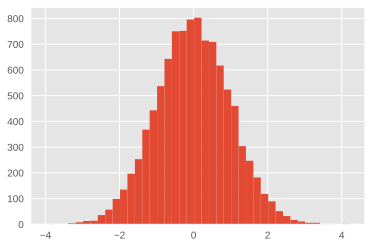

In [21]:
x = torch.randn(10000, dtype=torch.float)
binwidth = 0.2
plt.hist(
    x,
    bins=np.arange(min(x), max(x) + binwidth, binwidth),
)
plt.show()

In [ ]:
# Ones
torch.ones([3, 2], dtype=torch.float)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
# Zeros
torch.zeros([3, 2], dtype=torch.long)

tensor([[0, 0],
        [0, 0],
        [0, 0]])

In [46]:
# Create empty tensor
torch.empty([3, 2])

tensor([[1.7653e-35, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])

In [137]:
# Create sequence tensor from range
torch.arange(5, dtype= torch.float)

tensor([0., 1., 2., 3., 4.])

In [62]:
# Create tensor from defined values
inputs = np.random.normal(size = 5)
input_tensor = torch.tensor(inputs)
input_tensor

tensor([-1.9769,  0.9925, -0.1159, -0.9862, -1.5946], dtype=torch.float64)

In [63]:
# Transform to numpy array
input_tensor.numpy()

array([-1.97691468,  0.99253765, -0.11592761, -0.98618735, -1.5946176 ])

#### 1.2 reshape tensor

In [48]:
x = torch.randn([3, 2, 4], dtype=torch.float)
print(x.view(2, 2, 2, 3)) # explicit reshape
print(x.view(2, -1)) # -1 infers the remaining dimension

tensor([[[[ 0.6008,  2.1709, -2.2794],
          [ 0.8958,  1.4156,  0.8682]],

         [[-1.6522,  0.5880, -0.5825],
          [ 0.5068, -0.3829,  0.6295]]],


        [[[ 0.2618,  0.6511,  0.0570],
          [ 0.6735, -1.5636,  0.7434]],

         [[ 0.1318, -1.0615, -0.5686],
          [-0.4441,  0.2554, -0.8728]]]])
tensor([[ 0.6008,  2.1709, -2.2794,  0.8958,  1.4156,  0.8682, -1.6522,  0.5880,
         -0.5825,  0.5068, -0.3829,  0.6295],
        [ 0.2618,  0.6511,  0.0570,  0.6735, -1.5636,  0.7434,  0.1318, -1.0615,
         -0.5686, -0.4441,  0.2554, -0.8728]])


#### 1.3 tensor operations


**addition**

In [67]:
a = torch.ones([3,2], dtype=torch.float)
b = torch.FloatTensor([[2,3],[3,4],[4,5]])
result = torch.empty([2,3])
torch.add(a, b, out=result)
result

tensor([[3., 4.],
        [4., 5.],
        [5., 6.]])

In [68]:
a+b

tensor([[3., 4.],
        [4., 5.],
        [5., 6.]])

Operations with an additional `_` in the end mutates the original object

In [69]:
print(b)
b.add_(a)
print(b)

tensor([[2., 3.],
        [3., 4.],
        [4., 5.]])
tensor([[3., 4.],
        [4., 5.],
        [5., 6.]])


In [76]:
# Index tensor the same like for matrices
# Call .item() to get the scalar value, but only for one element tensors
b[2,1].item()

6.0

**transpose**

In [61]:
a.t()

tensor([[1., 1., 1.],
        [1., 1., 1.]])

**matrix multiplication**

In [169]:
a = torch.randn([5,3])
b = torch.randn([3,4])
a.mm(b)

tensor([[-3.4578e-01, -9.3088e-01,  3.4291e-01,  1.4419e+00],
        [ 1.5732e-01,  2.0832e+00,  3.5069e-01, -2.5895e-01],
        [-1.6073e-01, -1.1993e+00,  8.1138e-02,  8.6616e-01],
        [ 1.8662e-01,  1.3051e-01, -5.5489e-01, -1.4912e+00],
        [ 4.1880e-02,  1.5844e-01,  1.3837e-04, -9.6204e-02]])

**gradient**


Only variables with **`requires_grad=True`** will be differentiable. It tracks all the operations on the variable and stores a backward operation `grad_fn` in the dynamically constructed operation graph.

The differential numerator has to be scalar and the differential denominator needs to be part of the operation graph that computed the numerator. 

The gradient is computed by **`.backward()`** function and the gradient of the variable is stored in **`.grad`** feature of the variable.
 


In [127]:
var = Variable(torch.randn(2,2), requires_grad=True)
ones = torch.ones(2,2)
print('Variable "var" differentiable:', var.requires_grad)

out = (((var + 2)*2)/(var+2)).sum() # latest operation stored in out.grad_fn
print('output value:', out.item())
out.backward() # backward differentiation

print('Gradient of var: ')
print(var.grad.data) # gradient


Variable "var" differentiable: True
output value: 8.0
Gradient of var: 
tensor([[ 0.0000e+00, -5.9605e-08],
        [ 0.0000e+00,  0.0000e+00]])


You can also stop autograd from tracking history on Tensors with `.requires_grad=True` by wrapping the code block in with `torch.no_grad():`

## Create sample dataset

In [ ]:
num_features = 5
num_rows = 1000

x = torch.randn([num_rows, num_features], dtype=torch.float)
y = torch.cat(
    (
        torch.ones(int(num_rows/2)),
        torch.zeros(int(num_rows/2)),
    ),
    0,
)
y = y[torch.randperm(num_rows)]

In [155]:
print(x.size())
print(len(y))

torch.Size([1000, 5])
1000


In [ ]:
class RandomDataset(Dataset):
    def __init__(self, x, y):
        self.features = x
        self.targets = y
     
    def __getitem__(self, i):
        return self.features[i], self.targets[i]
    
    def __len__(self):
        return len(self.targets)

In [164]:
dataset = RandomDataset(x, y)
print('number of records:', len(dataset))

random_idx = random.randint(0,len(dataset)-1)
print('record', random_idx+1, 'is', dataset[random_idx])

number of records: 1000
record 619 is (tensor([-0.6168,  1.3028, -1.0894, -0.6425,  1.3665]), tensor(0.))


**Split into training, validation and test set**

In [ ]:
valid_ratio = 0.1
test_ratio = 0.1

num_valids = int(num_rows * valid_ratio) # 10% of total records
num_tests = int(num_rows * test_ratio) # 10% of total records
num_trains = num_rows - num_valids - num_tests # remaining for training

train, val, test = random_split(dataset, lengths=[num_trains,num_valids,num_tests])

**separate into batches**

In [ ]:
def collate(batch):
    features = torch.empty(0)
    for item in batch:
        features = torch.cat((features, item[0]))
    return (
        features.view(-1, len(item[0])),
        torch.LongTensor([item[1] for item in batch]),
    )
  
train_loader = DataLoader(train, batch_size=20, collate_fn=collate)
val_loader = DataLoader(val, batch_size=20, collate_fn=collate)
test_loader = DataLoader(test, batch_size=20, collate_fn=collate)

In [226]:
# Check that the batch loader are in correct size and data type
for i, inputs in enumerate(train_loader):
    if i == 0:
        x, y = inputs
        print(x.size())
        print(y)

torch.Size([20, 5])
tensor([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0])


## Feedforward Neural Network

![Feedforward Neural Net](https://github.com/scoutbeedev/pytorch-nlp-notebooks/blob/master/images/feedforward_nn_structure.png?raw=1)


Affine:
$$\delta = WX+b$$

Activation:
$$\alpha = f(\delta)$$ 

e.g.
$$\alpha = softmax(\delta)= \frac{e^{z_i}}{\sum_1^K e^{z_k}}$$

**2 layer fully connected neural net**

In [175]:
dtype = torch.float
N = 1000
D_in = 5
H = 10 
D_out = 20

x = torch.randn(N, D_in, device=device, dtype=dtype) # input
y = torch.randn(N, D_out, device=device, dtype=dtype) # output

# weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for epoch in range(10):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - y).pow(2).sum() # Sum of squared error
    print('Epoch:', epoch+1, ' | Loss:', loss.item())
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

Epoch: 1  | Loss: 618625.375
Epoch: 2  | Loss: 565913.25
Epoch: 3  | Loss: 520015.375
Epoch: 4  | Loss: 479773.75
Epoch: 5  | Loss: 444283.9375
Epoch: 6  | Loss: 412799.375
Epoch: 7  | Loss: 384717.21875
Epoch: 8  | Loss: 359560.3125
Epoch: 9  | Loss: 336911.0625
Epoch: 10  | Loss: 316449.25


**Let's create the classifier with the same approach, but with PyTorch's nn module**

In [ ]:
class BinaryClassifier(nn.Module):
    def __init__(self, device, input_size, hidden_size, output_size, batch_size):
        super(BinaryClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        batch_size = len(x)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        x = F.relu(self.fc1(x)) # 1st affine layer + relu activation
        return torch.sigmoid(self.fc2(x)) # 2nd affine layer + sigmoid activation

In [ ]:
batch_size = 20
# initiate the model
model = BinaryClassifier(device, num_features, 20, 2, batch_size)

Cross Entropy Loss:

$$Cross Entropy Loss = - \sum_{i}^C y_i \cdot log(\hat{y_i})$$

Predicted value: probability of being class `i`

$$\hat{y_i} = model(input)$$

In [ ]:
# define loss function criteria: cross entropy
criterion = nn.CrossEntropyLoss()

num_epochs = 500
learning_rate = 1e-3
train_losses, valid_losses = [], []

for epoch in range(num_epochs):
    # Training
    sum_train_loss, train_records = 0.0, 0.0
    for features, target in train_loader:
        prediction = model(features) # forward pass
        loss = criterion(prediction, target) # compute loss
        sum_train_loss += loss.item() # accumulated loss in this epoch
        train_records += len(target) # number of records in epoch
        loss.backward() # backward propagation

        for w in model.parameters(): # Update parameters
            w.data.sub_(w.grad.data * learning_rate)
    train_losses.append(sum_train_loss/train_records)
    
    # Compute validation loss
    sum_val_loss, val_records = 0.0, 0.0
    for features, target in val_loader:
        prediction = model(features)
        loss = criterion(prediction, target)
        
        sum_val_loss += loss.item()
        val_records += len(target)
    valid_losses.append(sum_val_loss/val_records)

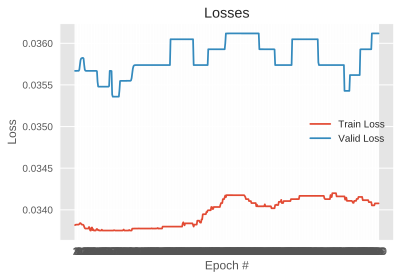

In [224]:
epoch_ticks = range(1, num_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()